# HOUSING PRICE PREDICTION IN CALIFORNIA

## Aim

The aim of this project is to build a machine learning model that helps us predict the median_house value of a house in the city of California. In this work all the features were used even those with low correlation with the just for demonstration purposes. 

### Tools used
- Numpy, pandas, matplotlib, seaborn, sklearn
- Linear regression, Random Forest Regressor

#### Importing our libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Impoerting our dataset and reading it using pandas

In [37]:
data = pd.read_csv("housing-California-data.csv")

In [38]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


We already have a quite clean data so we will directly dive into Exploratory data analysis while we may just drop NaN

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Since we have just few rows with no values, we will simply drop the NaN values.

In [40]:
data.dropna(inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Feature Engineering

We will now carry out our feature engineering to see the best features for our prediction then split them into a feature and target.

In [42]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [43]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [44]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
train_data = x_train.join(y_train)

In [47]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6114,-117.90,34.13,37.0,1801.0,422.0,1564.0,425.0,3.1597,<1H OCEAN,133000.0
12489,-121.49,38.57,38.0,2410.0,967.0,1091.0,829.0,1.2209,INLAND,87900.0
7927,-118.09,33.84,27.0,1594.0,295.0,1061.0,320.0,4.7917,<1H OCEAN,217700.0
3363,-120.36,40.45,19.0,689.0,143.0,355.0,127.0,1.7333,INLAND,70000.0
7277,-118.25,33.99,41.0,1486.0,509.0,2312.0,541.0,1.3963,<1H OCEAN,92900.0
...,...,...,...,...,...,...,...,...,...,...
1915,-120.97,38.91,7.0,4341.0,716.0,1978.0,682.0,4.8311,INLAND,172200.0
16849,-122.42,37.62,39.0,1355.0,214.0,682.0,246.0,6.3443,NEAR OCEAN,324700.0
7105,-118.00,33.90,35.0,1942.0,332.0,1127.0,325.0,4.5144,<1H OCEAN,206300.0
4837,-118.29,34.03,42.0,1680.0,557.0,2099.0,526.0,1.9167,<1H OCEAN,136400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

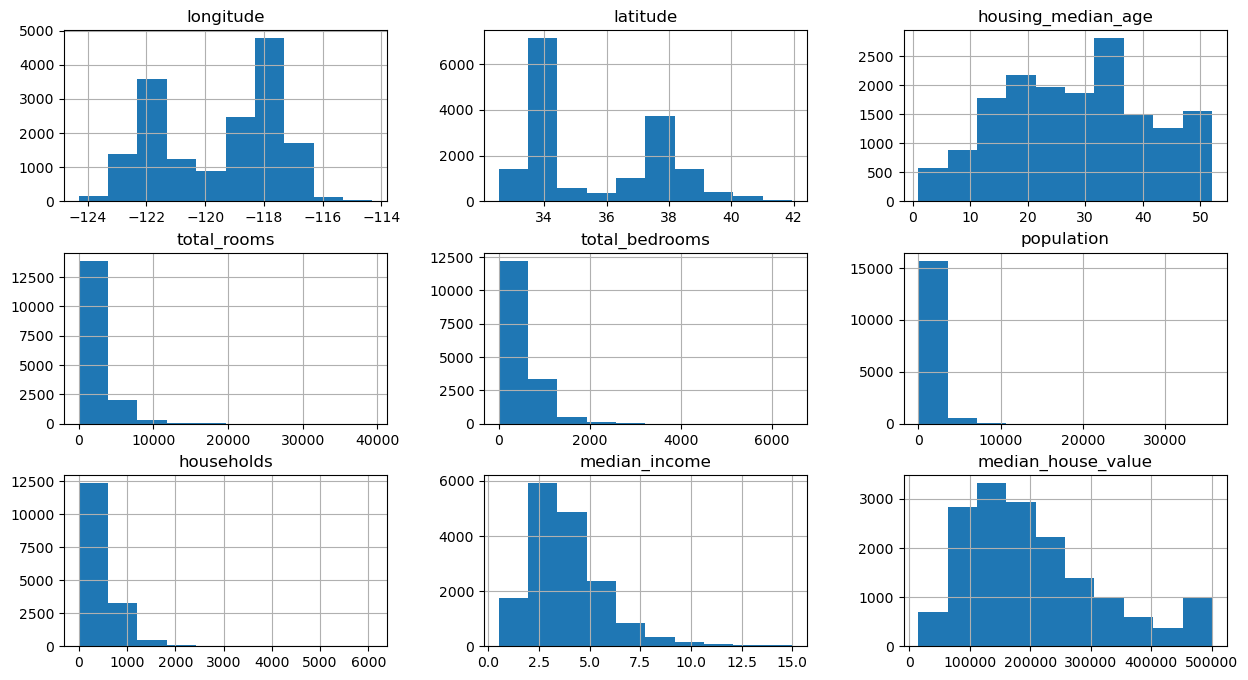

In [48]:
train_data.hist(figsize=(15,8))

Our data is skewed. Let's check th correlation between the features of our dataset.

In [49]:
train_data.corr()

C:\Users\AFC\AppData\Local\Temp\ipykernel_12616\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924307,-0.112713,0.046446,0.069908,0.101813,0.057998,-0.009223,-0.043175
latitude,-0.924307,1.000000,0.014612,-0.036145,-0.065632,-0.108287,-0.071386,-0.086302,-0.147939
housing_median_age,-0.112713,0.014612,1.000000,-0.357790,-0.317737,-0.291676,-0.299280,-0.117596,0.107839
total_rooms,0.046446,-0.036145,-0.357790,1.000000,0.931510,0.856499,0.920997,0.197108,0.131973
total_bedrooms,0.069908,-0.065632,-0.317737,0.931510,1.000000,0.875953,0.980698,-0.005894,0.048553
population,0.101813,-0.108287,-0.291676,0.856499,0.875953,1.000000,0.904391,0.006429,-0.026711
households,0.057998,-0.071386,-0.299280,0.920997,0.980698,0.904391,1.000000,0.014780,0.063728
median_income,-0.009223,-0.086302,-0.117596,0.197108,-0.005894,0.006429,0.014780,1.000000,0.689186
median_house_value,-0.043175,-0.147939,0.107839,0.131973,0.048553,-0.026711,0.063728,0.689186,1.000000


C:\Users\AFC\AppData\Local\Temp\ipykernel_12616\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

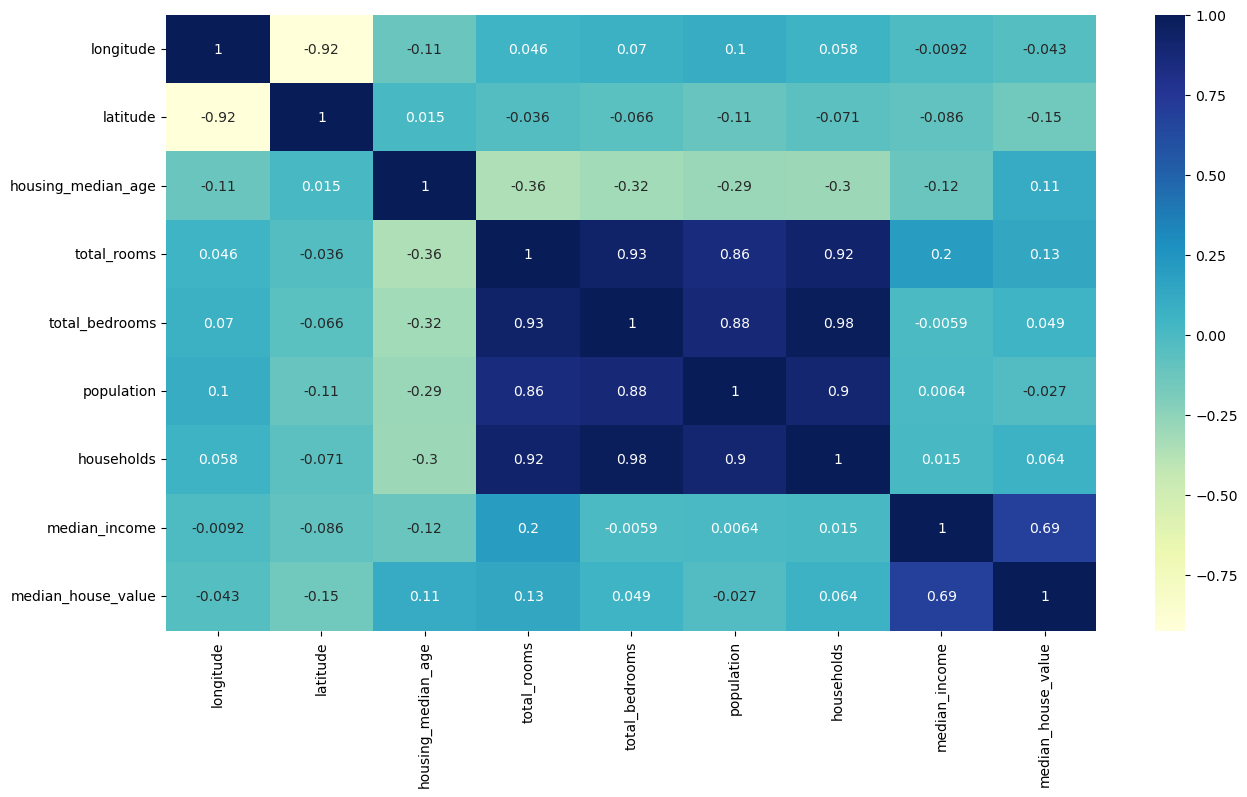

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [51]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

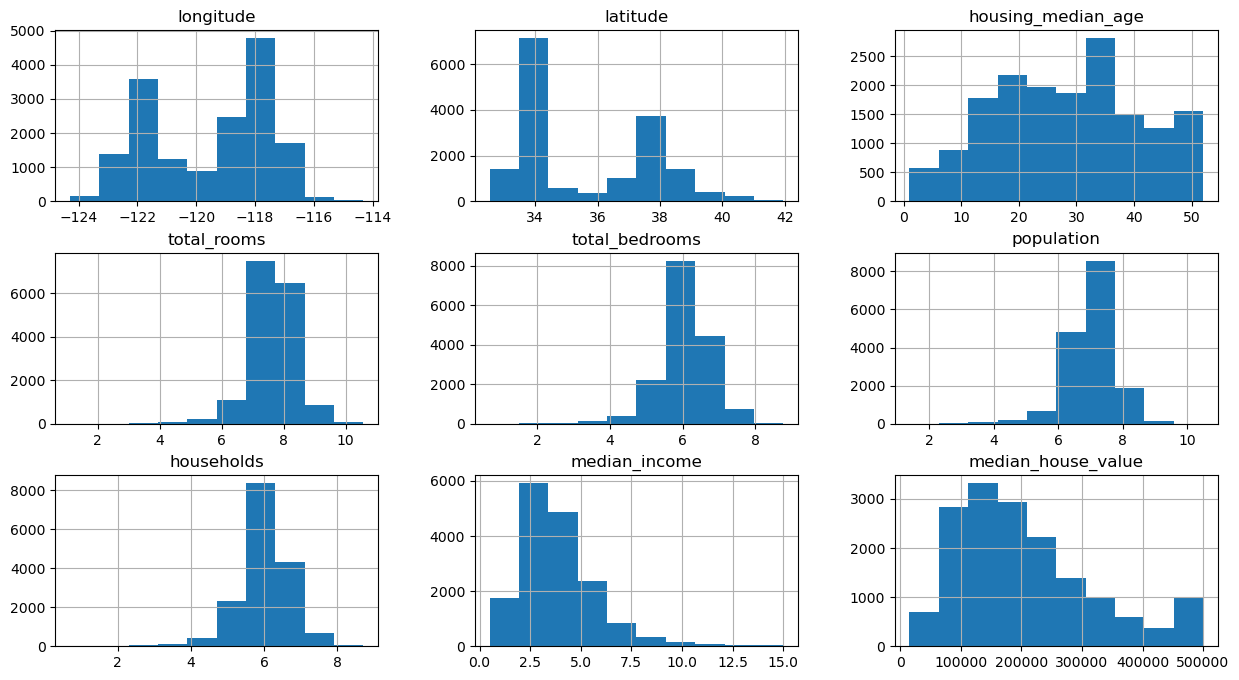

In [52]:
train_data.hist(figsize=(15,8))

In [53]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7223
INLAND        5215
NEAR OCEAN    2109
NEAR BAY      1795
ISLAND           4
Name: ocean_proximity, dtype: int64

Let's change the categories in the ocean_proximity column to numbers so as to be able to later fit them into our model.

In [54]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [55]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6114,-117.90,34.13,37.0,7.496652,6.047372,7.355641,6.054439,3.1597,133000.0,1,0,0,0,0
12489,-121.49,38.57,38.0,7.787797,6.875232,6.995766,6.721426,1.2209,87900.0,0,1,0,0,0
7927,-118.09,33.84,27.0,7.374629,5.690359,6.967909,5.771441,4.7917,217700.0,1,0,0,0,0
3363,-120.36,40.45,19.0,6.536692,4.969813,5.874931,4.852030,1.7333,70000.0,0,1,0,0,0
7277,-118.25,33.99,41.0,7.304516,6.234411,7.746301,6.295266,1.3963,92900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,-120.97,38.91,7.0,8.376090,6.575076,7.590347,6.526495,4.8311,172200.0,0,1,0,0,0
16849,-122.42,37.62,39.0,7.212294,5.370638,6.526495,5.509388,6.3443,324700.0,0,0,0,0,1
7105,-118.00,33.90,35.0,7.571988,5.808142,7.028201,5.786897,4.5144,206300.0,1,0,0,0,0
4837,-118.29,34.03,42.0,7.427144,6.324359,7.649693,6.267201,1.9167,136400.0,1,0,0,0,0


<Axes: >

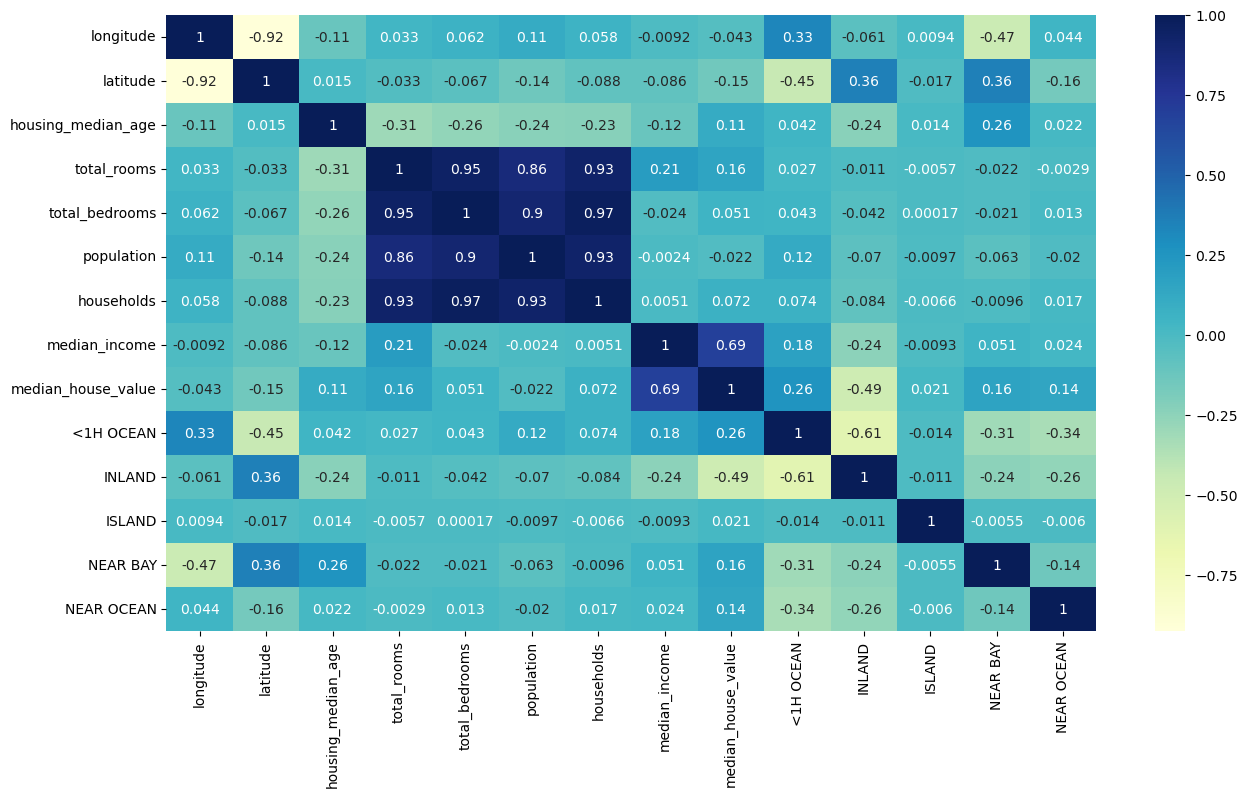

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

We can see clearly features having a low correlation with our median_house value but for this project we're just going to use all our features and even add some that may more useful.

<Axes: xlabel='latitude', ylabel='longitude'>

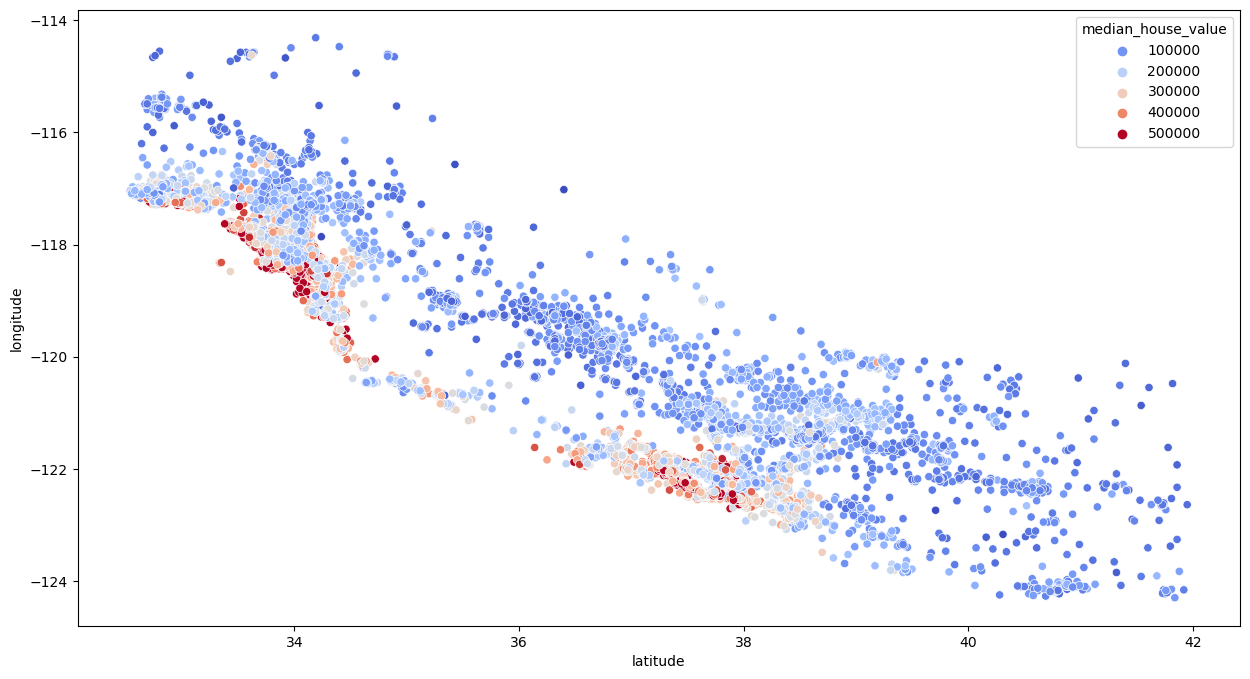

In [57]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette = "coolwarm")

We see that there are more expensive houses near the ocean.

We will now investigate to see whether the "bedroom_ratio" and household_rooms as seen below have a significant correlation with our target vector

In [58]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

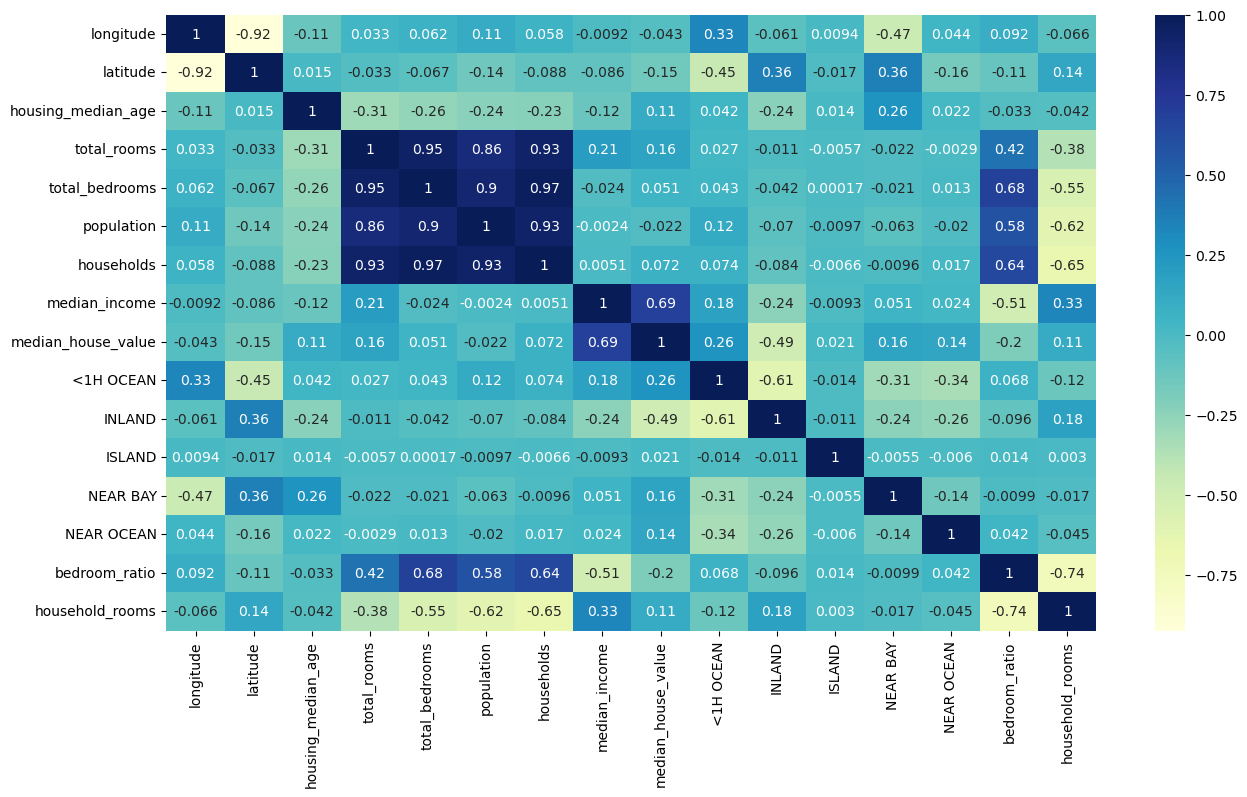

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Model building
Since we want to predict a number, we will first use Linear regression then if it doesn't performs well, we will use a better model.

In [60]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [61]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]


In [62]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

# Model Evaluation
Let's see how our model performs

In [63]:
reg.score(x_test, y_test)

0.668714336466024

We have here a score of 66.87% which is not the best. 
We are going to use a RandomForestRegrssor which is a more power model as compared to LinearRegression.

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
forest.score(x_test, y_test)

0.7991063738357058

We obtain a score of 79.9% which is a more acceptable

# Model Deployment
We will deploy our model and Communicate results using a function

In [70]:
def make_prediction(latitude, longitude, housing_median_age, total_rooms,total_bedrooms, population, households, median_income, H_OCEAN, INLAND, ISLAND, NEAR_BAY, NEAR_OCEAN, bedroom_ratio, household_rooms):
    data = {
        "latitude": latitude,
        "longitude": longitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "<1H OCEAN": H_OCEAN,
        "INLAND" : INLAND,
        "ISLAND": ISLAND,
        "NEAR BAY": NEAR_BAY,
        "NEAR OCEAN": NEAR_OCEAN,
        "bedroom_ratio": bedroom_ratio,
        "household_rooms": household_rooms
    }
    df = pd.DataFrame(data, index=[0])
    prediction = forest.predict(df)[0]
    return f"Predicted apartment price: ${prediction}"


In [72]:
#make_prediction(-120, 40, 6, 5,50, 100, 50, 3000, 0, 1, 0, 1, 1, 0.5, 2)